# SECTION 1: DECLARE THE MODULES

In [1]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')




# SECTION 2: Data import and preprocess
#Run this but dont worry if it does not make any sense Jump to SECTION 3 that is related to your HD task.

In [2]:
!pip install wget
import wget
    
link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data) 

In [3]:
DataSet

'training_attack_types (1).txt'

In [4]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [5]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [6]:
attack_mapping

{'apache2': 'dos',
 'back': 'dos',
 'buffer_overflow': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'httptunnel': 'u2r',
 'imap': 'r2l',
 'ipsweep': 'probe',
 'land': 'dos',
 'loadmodule': 'u2r',
 'mailbomb': 'dos',
 'mscan': 'probe',
 'multihop': 'r2l',
 'named': 'r2l',
 'neptune': 'dos',
 'nmap': 'probe',
 'normal': 'benign',
 'perl': 'u2r',
 'phf': 'r2l',
 'pod': 'dos',
 'portsweep': 'probe',
 'processtable': 'dos',
 'ps': 'u2r',
 'rootkit': 'u2r',
 'saint': 'probe',
 'satan': 'probe',
 'sendmail': 'r2l',
 'smurf': 'dos',
 'snmpgetattack': 'dos',
 'snmpguess': 'r2l',
 'spy': 'r2l',
 'sqlattack': 'u2r',
 'teardrop': 'dos',
 'udpstorm': 'dos',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'worm': 'probe',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'xterm': 'u2r'}

In [7]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)






In [8]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

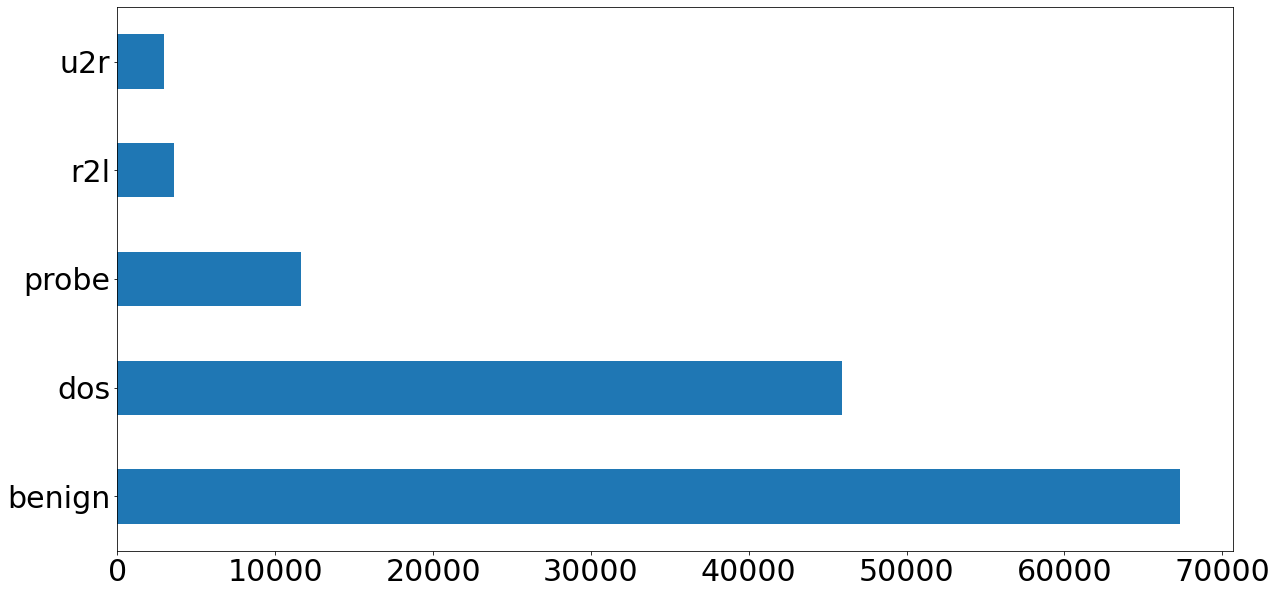

In [9]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])
    
train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# SECTION 3: Multi class classification
#This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms

In [10]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)


[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


In [11]:
# 5-class classification version SGD CLASSIFIER ALONE
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, zero_one_loss


classifier = SGDClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9010  280  419    1    1]
 [1555 6059   22    0    0]
 [ 805  131 1487    0    0]
 [2562    3    4    5    0]
 [ 195    3    0    0    2]]
0.2653034066713982


In [12]:
# 5-class classification version  SGD CLASSIFIER WITH PIPELINE
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, zero_one_loss

# scaling the input using a pipeline
classifier = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
classifier.fit(train_x, train_Y)
Pipeline(steps=[('standardscaler', StandardScaler()), ('sgdclassifier', SGDClassifier(random_state = 17))])

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9069  444  193    4    1]
 [1390 6228   18    0    0]
 [ 824  101 1498    0    0]
 [2564    2    3    5    0]
 [ 199    1    0    0    0]]
0.2547906316536551


In [40]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier



In [41]:
names = ['Nearest_Neighbors', 'Linear_SVM', 'Polynomial_SVM', 'RBF_SVM', 'Gaussian_Pocess', 'Gradient_Boosting', 'Decision_Tree', 'Extra_Trees', 'Random_Forest', 'Neural_Net', 'AdaBoost', 'Naive_Bayes', 'QDA', 'SGD']

classifiers = [
               KNeighborsClassifier(3), 
               SVC(kernel='linear', C=0.025), 
               SVC(kernel='poly', degree=3, C=0.025),
               SVC(kernel='rbf', C=1, gamma=2),
               GaussianProcessClassifier(1.0 * RBF(1.0)),
               GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
               DecisionTreeClassifier(max_depth=5),
               ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
               RandomForestClassifier(max_depth=5, n_estimators=100),
               MLPClassifier(alpha=1, max_iter=1000),
               AdaBoostClassifier(n_estimators=100),
               GaussianNB(),
               QuadraticDiscriminantAnalysis(),
               SGDClassifier(loss='hinge', penalty='l2')]

In [32]:
names = ['Linear_SVM']

classifiers = [
               SVC(kernel='linear', C=0.025)]

In [ ]:
# iterate over classifiers
scores = []
for name, classifier in zip(names, classifiers):
  classifier.fit(train_x, train_Y)
  score = classifier.score(test_x, test_Y)
  scores.append(score)

In [34]:
scores

[0.7488023420865862]

In [36]:
import seaborn as sns

In [37]:
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Linear_SVM,0.748802


In [38]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

cm = sns.light_palette('green', as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,score
0,Linear_SVM,0.748802


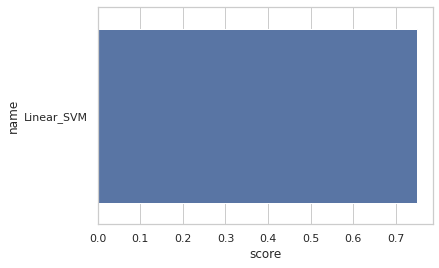

In [39]:
sns.set(style='whitegrid')
ax = sns.barplot(y='name', x='score', data=df)